In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Intro to clustering and k-means

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Format and preprocess data for clustering
- Perform a K-Means clustering analysis
- Evaluate clusters for fit

![](http://img.tesco.com/Groceries/pi/476/5011546405476/IDShot_540x540.jpg)

# Being able to create clusters is a powerful (and delicious!) tool that will make you a stronger data scientist


# What's the difference between supervised and unsupervised learning?

![](assets/supervised-vs-unsupervised.jpg)

**Classification** - create a model to predict which group a point belongs to

**Clustering** - find groups that exist in the data already

# How could unsupervised learning or clustering be useful?

### Helpful uses for clustering: 
   - Find items with similar behavior (users, products, voters, etc)
   - Market segmentation
   - Understand complex systems
   - Discover meaningful categories for your data
   - Reduce the number of classes by grouping (e.g. bourbons, scotches -> whiskeys)
   - Reduce the dimensions of your problem
   - Pre-processing! Create labels for supervised learning

# Great. Clustering is useful.
-
# Any ideas how to algorithmically tell which groups are different?

![](http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/images/clustering.gif)

# K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Create your clusters. Assign each point to the nearest centroid. 
4. Make your clusters better. Move each centroid to the center of its cluster. 
5. Repeat steps 3-4 until your centroids converge. 

# K Means

1. Pick a value for k (the number of clusters to create)

![](assets/kmeans1.png)

# K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data

![](assets/kmeans2.png)

# K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Assign each point to the nearest centroid. These are your 'clusters'.

![](assets/kmeans3.png)

# K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Assign each point to the nearest centroid. These are your clusters.
4. Make your clusters better. Move each centroid to the center of its cluster. 

![](assets/kmeans4.png)

# K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Assign each point to the nearest centroid. These are your clusters.
4. Make your clusters better. Move each centroid to the center of its cluster. 
5. Repeat steps 3-4 until your centroids converge. 

![](assets/kmeans5.png)

# K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Assign each point to the nearest centroid. These are your clusters.
4. Make your clusters better. Move each centroid to the center of its cluster. 
5. Repeat steps 3-4 until your centroids converge. 

![](assets/kmeans6.png)

# K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Assign each point to the nearest centroid. These are your clusters.
4. Make your clusters better. Move each centroid to the center of its cluster. 
5. Repeat steps 3-4 until your centroids converge. 

![](assets/kmeans7.png)

# K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Assign each point to the nearest centroid. These are your clusters.
4. Make your clusters better. Move each centroid to the center of its cluster. 
5. Repeat steps 3-4 until your centroids converge. 

![](assets/kmeans8.png)

# K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Assign each point to the nearest centroid. These are your clusters.
4. Make your clusters better. Move each centroid to the center of its cluster. 
5. Repeat steps 3-4 until your centroids converge. 

![](assets/kmeans9.png)

# K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Assign each point to the nearest centroid. These are your clusters.
4. Make your clusters better. Move each centroid to the center of its cluster. 
5. Repeat steps 3-4 until your centroids converge. 

![](assets/kmeans10.png)

These tutorial images come from Andrew Moore's CS class at Carnegie Mellon. His slide deck is online here: https://www.autonlab.org/tutorials/kmeans11.pdf. He also links to more of his tutorials on the first page. 


# Let's practice a toy example by hand. Take a 1-dimensional array of numbers:

In [2]:
arr = [2, 5, 6, 8, 12, 15, 18, 28, 30]

Pick k=3 random starting centroids and let the other points fall into clusters based on the closest centroid. Then, reassign your centroids based on the mean value of your cluster and repeat the process. 

Check with your neighbors. Do you have the same clusters? Why or why not?

#### K Means is a powerful algorithm, but different starting points may give you different clusters. You won't necessarily get an optimal cluster.  

# Metrics for assessing your clusters

**Inertia** -- sum of squared errors for each cluster
- ranges from 0 to very high values
- low inertia = dense clusters

**Silhouette Score** -- measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated


**Inertia** -- sum of squared errors for each cluster
- low inertia = dense cluster

$$\sum_{j=0}^{n} (x_j - \mu_i)^2$$

where $\mu_i$ is a cluster centroid. (K-means explicitly tries to minimize this.)

`.inertia_` is an attribute of sklearn's kmeans models.


**Silhouette Score** -- measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated

The definition is a little involved$^*$, but intuitively the score is based on how much closer data points are to their own clusters than to the nearest neighbor cluster.

We can calculate it in sklearn with `metrics.silhouette_score(X_scaled, labels, metric='euclidean')`.

$^*$<https://en.wikipedia.org/wiki/Silhouette_(clustering)>


# How do I know which K to pick?

Sometimes you have good context:
   - I need to create 3 profiles for marketing to target

Other times you have to figure it out:
   - My scatter plots show 2 linearly separable clusters

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Guided practice
Let's do some clustering with the iris dataset.

In [13]:
# Check out the dataset and our target values
df = pd.read_csv("data/iris.csv")
print(df['Name'].value_counts())
df.head(5)

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Name, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's plot the data to see the distributions:

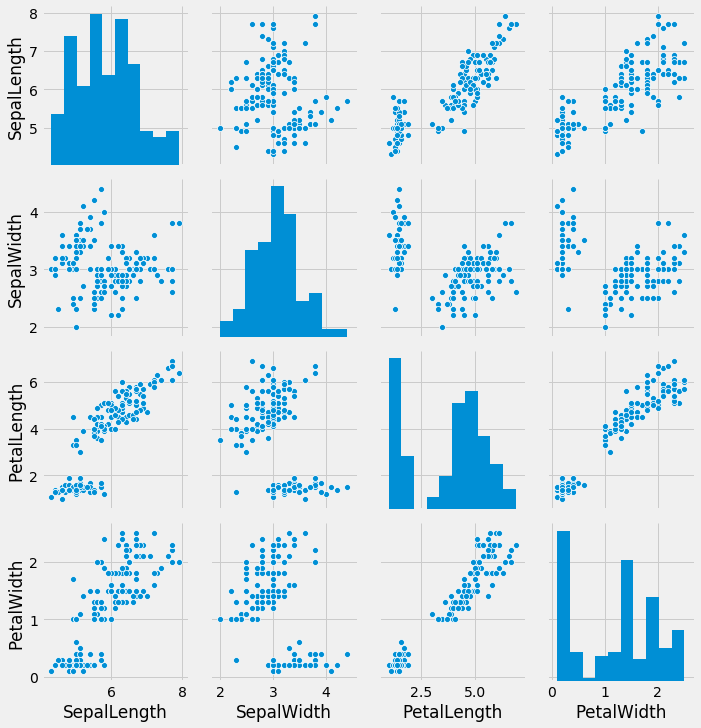

In [3]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

Next, since each of our features have different units and ranges, let's do some preprocessing:

In [4]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [5]:
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Now that we've formatted our data and understand its structures, we can finally go ahead and cluster.

We're going to set k = 2, given the pattern we were seeing above in our graphs.

In [6]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

We can use Scikit's built-in functions to determine the locations of the labels, centroids, and cluster inertia:

In [7]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

And to compute the clusters' silhouette coefficient:


In [8]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.6294675561906644

...and we're done! You've completed your first clustering analysis.

Let's see how it looks. First, let's put the labels columns into our dataframe

In [9]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


Let's plot each cluster in a different color. Seaborn has a 'hue' parameter we can use for this. 

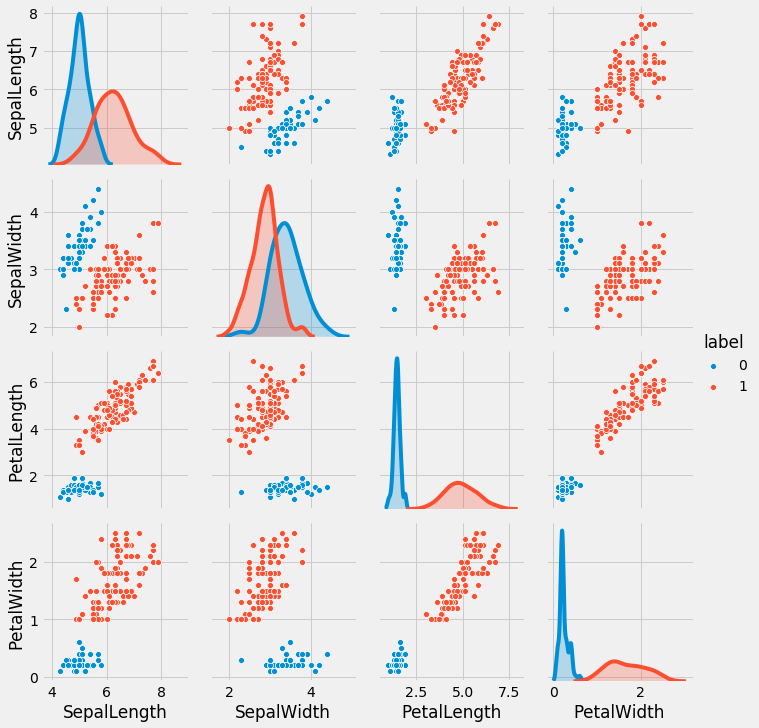

In [10]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

For comparison, here's the data colored by name of the plant. 


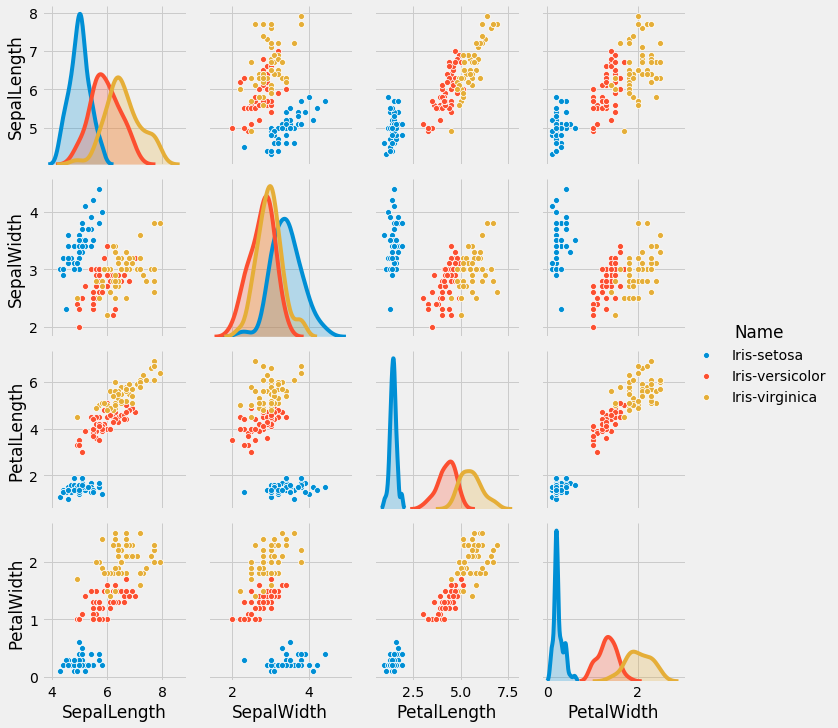

In [11]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')

# Independent practice

A) Repeat our clustering analysis for the foods nutrients dataset (below). There are no "true" labels for this one!

B) Then go back up and separate our iris observations into *different* numbers of clusters.

- How do the inertia and silhouette scores change?
- What if you don't scale your features?
- Is there a 'right' k? Why or why not?

Repeat this for the foods nutrients dataset.

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

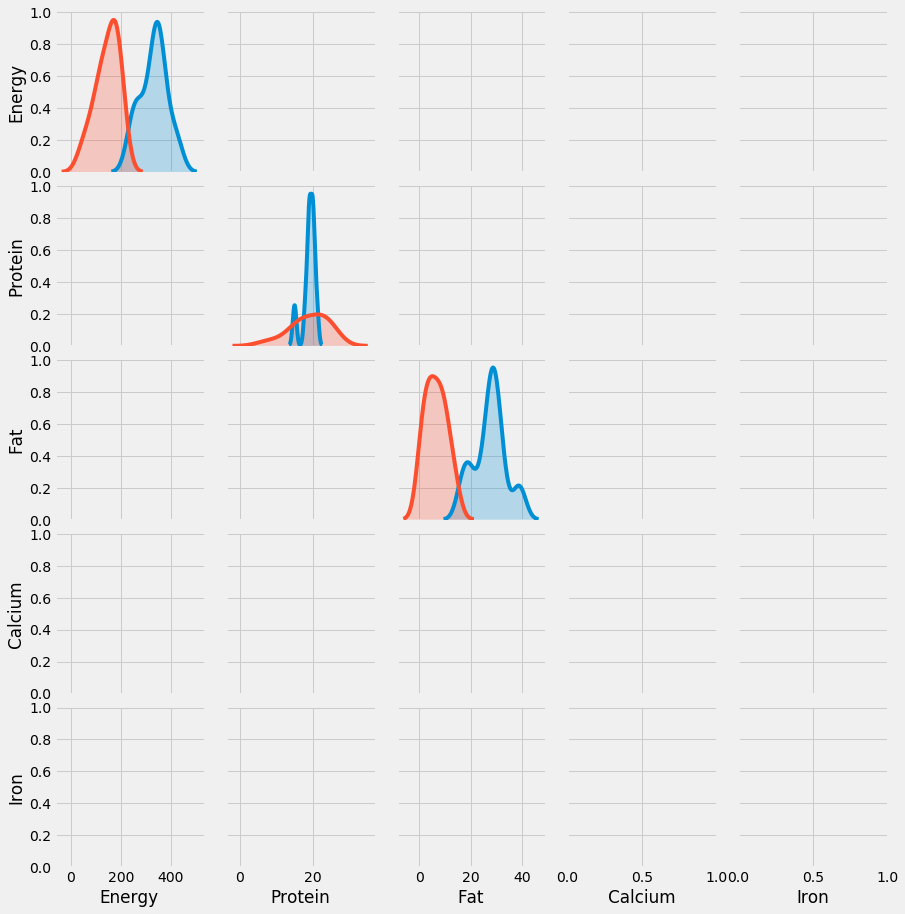

In [12]:
# http://people.sc.fsu.edu/~jburkardt/datasets/hartigan/file06.txt
import pandas as pd
foods  = pd.read_csv('./data/nutrients.txt', sep=r'\s+')
foods.head()

k = 2
X_scaled = preprocessing.MinMaxScaler().fit_transform(foods.drop('Name',axis=1))
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
foods['label'] = labels
foods.head()

cols = foods.columns[1:-1]
sns.pairplot(foods, x_vars=cols, y_vars= cols, hue='label');

## Further reading

- The [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html) has a great summary of many other clustering algorithms.
- [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) is one popular alternative.
- This [PyData talk](https://www.youtube.com/watch?v=Mf6MqIS2ql4) is good overview of clustering, different algorithms, and how to think about the quality of your clusters.